# 批量校正大量rna序列或微阵列数据

数据集中的变异性不仅是生物过程的产物：它们也是技术偏见的产物（Lander 等人，1999 年）。ComBat 是用于纠正这些称为批次效应的技术偏见的最广泛使用的工具之一。

pyComBat (Behdenna et al .， 2020)是ComBat (Johnson et al .， 2007)的新Python实现，ComBat是一种广泛用于微阵列数据批量效果调整的软件。虽然数学框架是严格相同的，pyComBat
- 在批处理效果校正方面有类似的结果吗
- 是否和战斗的R执行一样快或更快
- 为社区提供参与其开发的新工具。

论文:[pyComBat, a Python tool for batch effects correction in high-throughput molecular data using empirical Bayes methods](https://doi.org/10.1101/2020.03.17.995431)

Code: [https://github.com/epigenelabs/pyComBat](https://github.com/epigenelabs/pyComBat)

Colab_Reproducibility：https://colab.research.google.com/drive/121bbIiI3j4pTZ3yA_5p8BRkRyGMMmNAq?usp=sharing



In [2]:
import anndata
import pandas as pd
import omicverse as ov
ov.ov_plot_set()

/slurm/home/admin/.conda/envs/grns/lib/python3.11/site-packages/torch_geometric/typing.py:54: UserWarning: An issue occurred while importing 'pyg-lib'. Disabling its usage. Stacktrace: /lib64/libm.so.6: version `GLIBC_2.29' not found (required by /slurm/home/admin/.conda/envs/grns/lib/python3.11/site-packages/libpyg.so)
  warnings.warn(f"An issue occurred while importing 'pyg-lib'. "
/slurm/home/admin/.conda/envs/grns/lib/python3.11/site-packages/torch_geometric/typing.py:110: UserWarning: An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: /lib64/libm.so.6: version `GLIBC_2.29' not found (required by /slurm/home/admin/.conda/envs/grns/lib/python3.11/site-packages/libpyg.so)
  warnings.warn(f"An issue occurred while importing 'torch-sparse'. "



   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.6.5, Tutorials: https://omicverse.readthedocs.io/
All dependencies are satisfied.


这个最小的使用示例说明了如何在默认设置中使用pyComBat，并显示了卵巢癌数据的一些结果，这些数据可以在NCBI的[Gene Expression Omnibus](https://www.ncbi.nlm.nih.gov/geo/)上免费获得，即

- GSE18520
- GSE66957
- GSE69428



In [1]:
dataset_1 = pd.read_pickle("../../data/GSE18520.pickle")
dataset_1

NameError: name 'pd' is not defined

In [4]:
dataset_1.T

gene_symbol,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A4GALT,A4GNT,AA06,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
GSM461348,4.140080,5.747136,5.026368,7.892506,5.264009,3.966217,5.302436,5.064520,4.513947,4.944591,...,7.516405,10.314396,7.279437,5.171086,6.198887,5.004921,7.176005,7.225408,6.074863,8.780318
GSM461349,4.589471,6.130257,5.120523,7.730116,4.685076,4.482255,5.271300,5.133535,4.557562,5.075576,...,7.338738,10.424796,6.397205,4.826918,6.414474,5.445204,6.510578,6.779436,5.997629,8.248961
GSM461350,4.526200,5.781449,5.220462,7.796338,5.087545,3.964664,5.772558,5.378699,4.677231,5.387585,...,6.619994,7.966726,6.659357,5.028612,6.154941,5.857117,6.424211,7.319842,5.804114,7.662371
GSM461351,4.326366,5.914044,4.828303,8.525168,5.309136,3.906967,5.620846,5.012225,4.824749,4.631764,...,7.136008,9.412548,7.587193,5.490121,6.360796,5.526792,6.589985,7.752277,6.615623,8.143126
GSM461352,4.141506,6.277715,5.078094,7.545032,4.945470,3.952820,5.611947,5.461094,4.461609,5.560811,...,7.352017,10.609385,7.279435,5.175951,6.097324,5.164317,6.425785,7.358358,6.112776,8.446810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM462648,4.739403,6.658268,4.564726,7.659876,6.537758,3.250932,4.754917,5.118615,4.176160,4.198497,...,6.953343,7.596134,8.395765,5.377360,6.362509,3.643435,8.654275,7.892368,6.317461,9.317507
GSM462649,4.712107,5.879830,4.366117,7.913722,6.081657,3.287019,5.353565,4.852891,4.375150,4.063723,...,7.531984,8.140798,8.522291,5.382634,6.396130,4.411884,8.705879,8.210602,6.572000,9.131613
GSM462650,4.808004,5.933032,4.381249,7.427419,5.413729,3.526342,4.755306,5.065380,4.439921,4.746004,...,6.890455,7.991095,7.720237,5.117420,6.471585,4.012999,8.310356,8.032438,6.563755,8.947400
GSM462651,4.703300,5.687564,4.297101,8.196998,5.796207,3.425167,4.076888,4.732342,4.237387,4.986344,...,7.618661,9.438387,8.664382,5.217890,6.585442,4.103803,8.504587,8.331878,6.155653,9.142083


In [5]:
adata1=anndata.AnnData(dataset_1.T)
adata1.obs['batch']='1'
adata1

AnnData object with n_obs × n_vars = 63 × 21755
    obs: 'batch'

In [6]:
dataset_2 = pd.read_pickle("../../data/GSE66957.pickle")
adata2=anndata.AnnData(dataset_2.T)
adata2.obs['batch']='2'
adata2

AnnData object with n_obs × n_vars = 69 × 22115
    obs: 'batch'

In [7]:
dataset_3 = pd.read_pickle("../../data/GSE69428.pickle")
adata3=anndata.AnnData(dataset_3.T)
adata3.obs['batch']='3'
adata3

AnnData object with n_obs × n_vars = 29 × 21755
    obs: 'batch'

我们使用concat函数将三个数据集连接在一起，并取相同基因的交集

In [8]:
adata=anndata.concat([adata1,adata2,adata3], merge='same')
adata

AnnData object with n_obs × n_vars = 161 × 17126
    obs: 'batch'

## 去除批处理效果

In [11]:
ov.bulk.batch_correction(adata,batch_key='batch')

Found 3 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data
Storing batch correction result in adata.layers['batch_correction']


## 保存结果
### 原始数据集

In [12]:
raw_data=adata.to_df().T
raw_data.head()

,GSM461348,GSM461349,GSM461350,GSM461351,GSM461352,GSM461353,GSM461354,GSM461355,GSM461356,GSM461357,...,GSM1701044,GSM1701045,GSM1701046,GSM1701047,GSM1701048,GSM1701049,GSM1701050,GSM1701051,GSM1701052,GSM1701053
gene_symbol,,,,,,,,,,,,,,,,,,,,,
A1BG,4.140080,4.589471,4.526200,4.326366,4.141506,4.528423,4.419378,4.345215,4.184150,4.393646,...,3.490229,4.542913,4.654638,4.199212,4.080964,4.114272,3.883770,4.103220,3.883770,3.487520
A1BG-AS1,5.747136,6.130257,5.781449,5.914044,6.277715,5.668244,5.879830,6.013980,5.968187,6.017624,...,4.005230,4.301880,4.509698,4.089223,4.129561,3.867567,4.094032,3.616044,4.307225,3.891060
A1CF,5.026368,5.120523,5.220462,4.828303,5.078094,5.204209,4.865023,5.119231,5.219517,4.706890,...,4.225589,3.530307,3.215182,2.967514,3.012953,3.496765,3.117001,3.072093,2.570765,3.163533
A2M,7.892506,7.730116,7.796338,8.525168,7.545032,7.846979,7.638513,7.487679,7.533089,6.965395,...,10.273206,4.061911,4.393332,4.716536,3.447348,3.134037,4.009413,3.953612,7.664853,3.548574
A2ML1,3.966217,4.482255,3.964664,3.906967,3.952820,3.985276,3.997008,4.101457,4.015285,3.765736,...,2.478731,4.132282,3.952693,2.527621,2.358378,2.414869,2.204600,2.295500,2.167646,2.216867


### 删除批处理数据集

In [13]:
removing_data=adata.to_df(layer='batch_correction').T
removing_data.head()

,GSM461348,GSM461349,GSM461350,GSM461351,GSM461352,GSM461353,GSM461354,GSM461355,GSM461356,GSM461357,...,GSM1701044,GSM1701045,GSM1701046,GSM1701047,GSM1701048,GSM1701049,GSM1701050,GSM1701051,GSM1701052,GSM1701053
gene_symbol,,,,,,,,,,,,,,,,,,,,,
A1BG,4.223549,4.846659,4.758930,4.481847,4.225527,4.762012,4.610814,4.507982,4.284655,4.575135,...,4.237836,5.378695,5.499778,5.006205,4.878052,4.914150,4.664341,4.902173,4.664341,4.234900
A1BG-AS1,5.730287,6.253722,5.777166,5.958322,6.455185,5.622500,5.911578,6.094859,6.032295,6.099838,...,5.841898,5.990944,6.095359,5.884098,5.904365,5.772731,5.886515,5.646358,5.993630,5.784535
A1CF,3.922941,3.975597,4.031489,3.812171,3.951869,4.022399,3.832708,3.974874,4.030960,3.744271,...,4.229096,3.822095,3.637628,3.492649,3.519248,3.802460,3.580155,3.553867,3.260401,3.607394
A2M,9.488789,9.219466,9.329295,10.538060,8.912504,9.413282,9.067542,8.817383,8.892696,7.951175,...,11.137032,7.182184,7.393206,7.598996,6.790880,6.591389,7.148757,7.113228,9.476245,6.855333
A2ML1,4.317770,5.553678,4.314051,4.175866,4.285686,4.363418,4.391514,4.641670,4.435287,3.837621,...,3.807064,5.766146,5.553374,3.864987,3.664473,3.731402,3.482281,3.589976,3.438499,3.496814


In [ ]:
raw_data.to_csv('../results/raw_data.csv')
removing_data.to_csv('../results/removing_data.csv')

### 您还可以保存数据对象

In [ ]:
adata.write_h5ad('adata_batch.h5ad',compression='gzip')
#adata=ov.read('adata_batch.h5ad')

## 比较校正前后的数据集

我们为三个不同的数据集指定了三种不同的颜色

In [14]:
color_dict={
    '1':ov.utils.red_color[1],
    '2':ov.utils.blue_color[1],
    '3':ov.utils.green_color[1],
}

In [15]:
ov.utils.red_color

['#F0C3C3',
 '#E07370',
 '#CB3E35',
 '#A22E2A',
 '#5A1713',
 '#D3396D',
 '#DBC3DC',
 '#85539B',
 '#5C2B80',
 '#5C4694']

In [17]:
import matplotlib.pyplot as plt

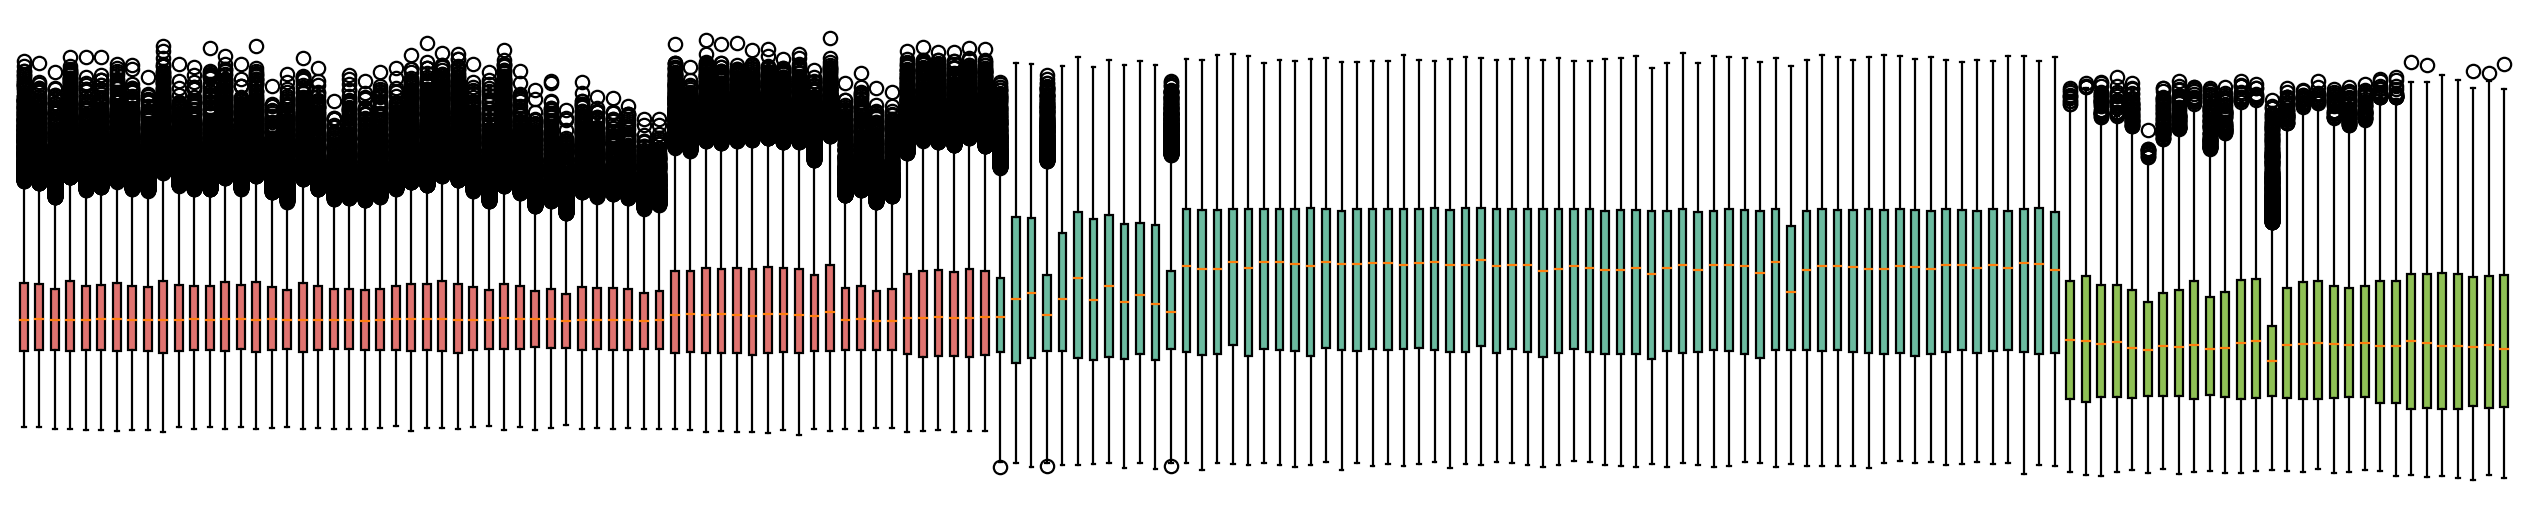

In [18]:
fig,ax=plt.subplots( figsize = (20,4))
bp=plt.boxplot(adata.to_df().T,patch_artist=True)
for i,batch in zip(range(adata.shape[0]),adata.obs['batch']):
    bp['boxes'][i].set_facecolor(color_dict[batch])
ax.axis(False)
plt.show()

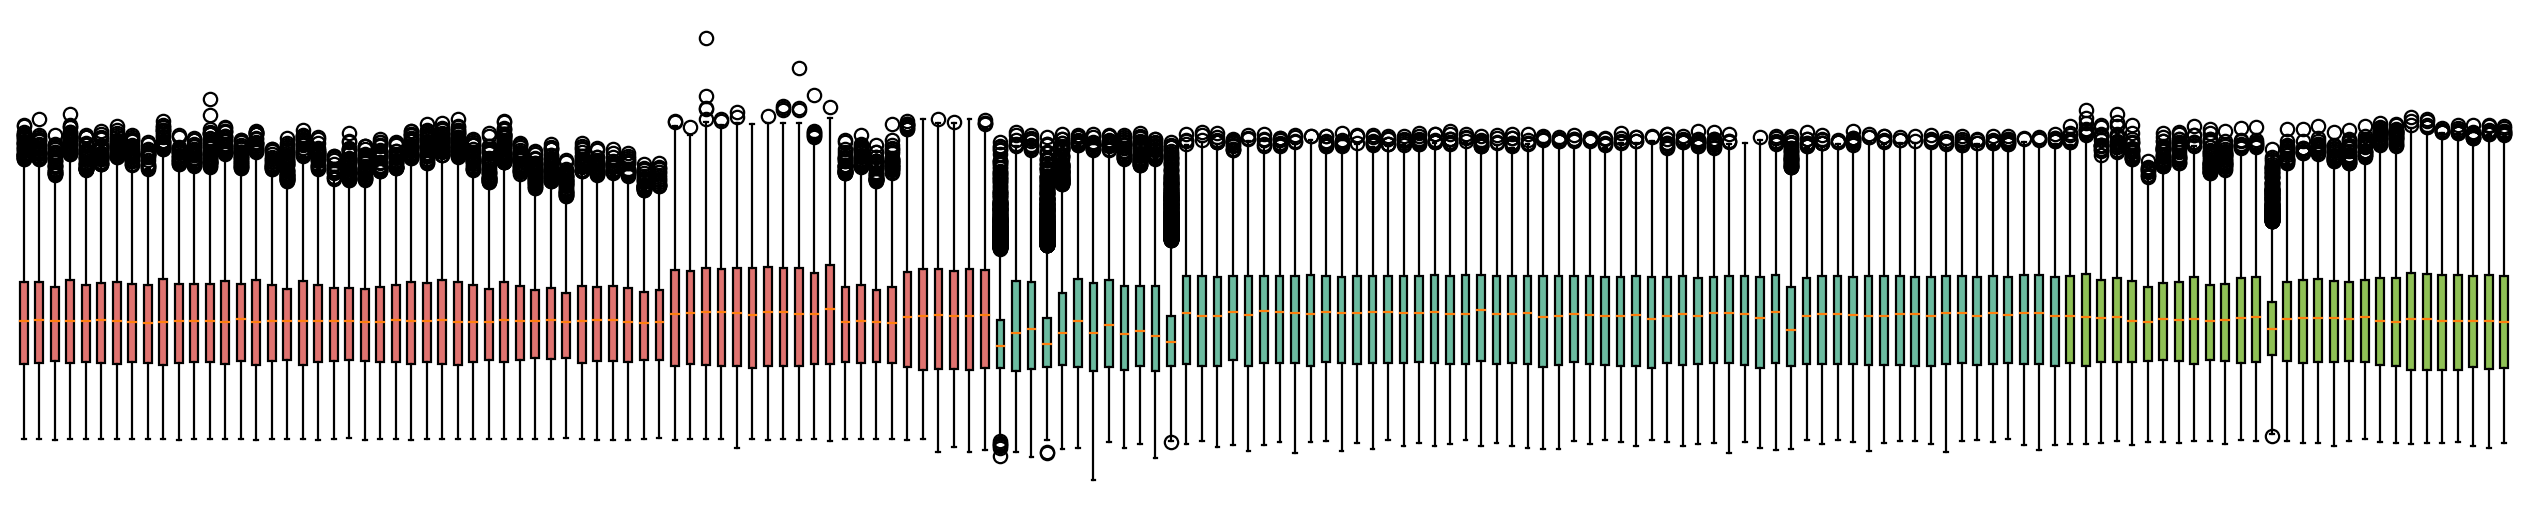

In [19]:
fig,ax=plt.subplots( figsize = (20,4))
bp=plt.boxplot(adata.to_df(layer='batch_correction').T,patch_artist=True)
for i,batch in zip(range(adata.shape[0]),adata.obs['batch']):
    bp['boxes'][i].set_facecolor(color_dict[batch])
ax.axis(False)
plt.show()

除了使用箱线图来观察批量去除的效果，我们还可以使用PCA来观察批量去除的效果

In [20]:
adata.layers['raw']=adata.X.copy()

然后在批处理校正数据集上计算主成分分析

In [24]:
ov.pp.pca(adata,layer='batch_correction',n_pcs=50)
adata

computing PCA
    with n_comps=50
    finished (0:00:00)


AnnData object with n_obs × n_vars = 161 × 17126
    obs: 'batch'
    uns: 'pca', 'raw|original|pca_var_ratios', 'raw|original|cum_sum_eigenvalues', 'batch_colors', 'batch_correction|original|pca_var_ratios', 'batch_correction|original|cum_sum_eigenvalues'
    obsm: 'X_pca', 'raw|original|X_pca', 'batch_correction|original|X_pca'
    varm: 'PCs', 'raw|original|pca_loadings', 'batch_correction|original|pca_loadings'
    layers: 'batch_correction', 'raw', 'lognorm'

In [21]:
ov.pp.pca(adata,layer='raw',n_pcs=50)
adata

computing PCA
    with n_comps=50
    finished (0:00:00)


AnnData object with n_obs × n_vars = 161 × 17126
    obs: 'batch'
    uns: 'pca', 'raw|original|pca_var_ratios', 'raw|original|cum_sum_eigenvalues'
    obsm: 'X_pca', 'raw|original|X_pca'
    varm: 'PCs', 'raw|original|pca_loadings'
    layers: 'batch_correction', 'raw', 'lognorm'

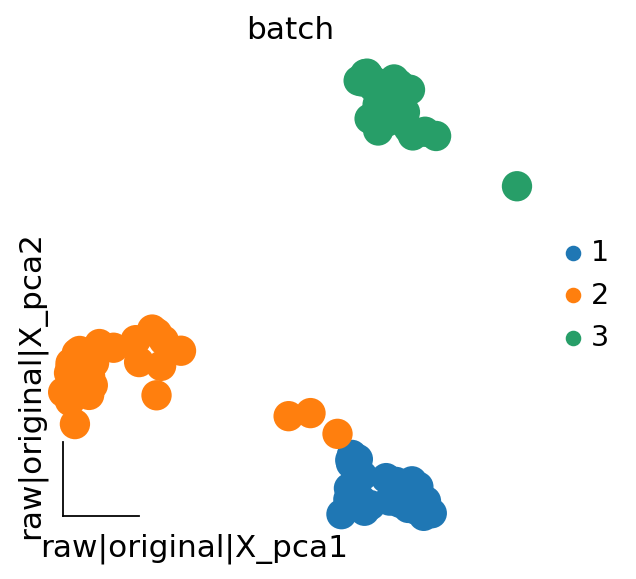

In [22]:
ov.utils.embedding(adata,
                  basis='raw|original|X_pca',
                  color='batch',
                  frameon='small')

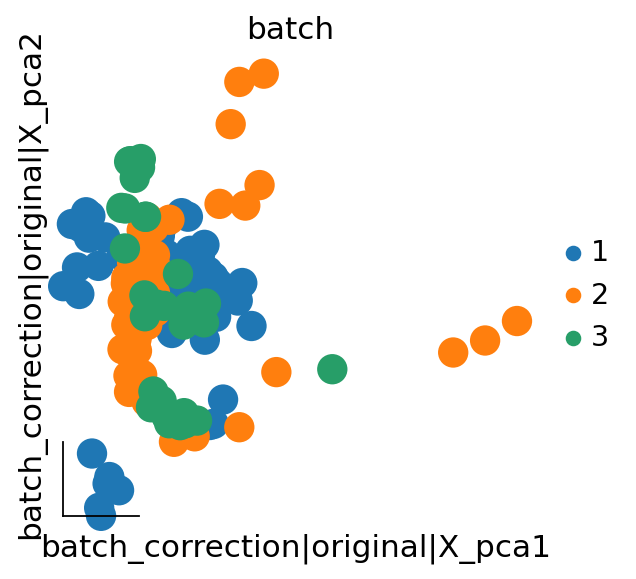

In [25]:
ov.utils.embedding(adata,
                  basis='batch_correction|original|X_pca',
                  color='batch',
                  frameon='small')